
Entrega #4 - Dynamic Programming - Value iteration Gambler's Problem

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: Jun 18, 2023



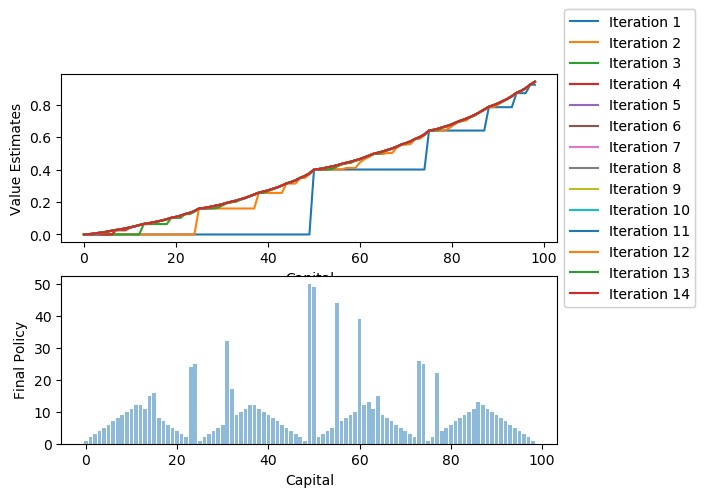

In [1]:
#!/usr/bin/env python

"""
Entrega #4 - Dynamic Programming - Value iteration Gambler's Problem

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: Jun 18, 2023
"""

import numpy as np
import matplotlib.pyplot as plt

print(__doc__)

class Gambler:
    """
    Class Gambler.
    Have all methods needed to implement the Gambler's problem
    with value iteration.
    """
    
    def __init__(self, prob, iterations, theta=0.00000001):
        self.value = np.zeros(101) # Set a list of 100 values 0
        self.reward = np.zeros(101) # Set a list of 100 values 0
        self.value[100] = 1 # Set 1 on the last element
        self.values_recorded = []
        self.pi = []
        self.prob = prob
        self.iterations = iterations
        self.theta = theta

    def value_iteration(self):
        """
        Value iteration, for estimating policy.
        Theta will determine accuracy of estimation
        """
        delta = 0
        self.pi = []
        p = np.zeros(101)
        while delta < self.theta:
            for capital in range(1,100):
                # Store the previous value of current state
                previous_value = self.value[capital]
                # Bet value with minimum of 1 and maximum of 100 - capital
                for bet in range(1, min(capital, 100 - capital)+1): 
                    # Calculates the value of a bet(action) from a current amount of money(state)
                    p[bet] = self.prob*(self.reward[capital + bet] + self.value[capital + bet]) + (1-self.prob)*(self.reward[capital - bet] + self.value[capital - bet])
                # Update the maximum value
                self.value[capital] = max(p)
                # Update delta
                delta = max(delta, abs(previous_value - self.value[capital]))
                # Store the new optimal policy
                self.pi.append(np.argmax(p))
        # Store the new values
        self.values_recorded.append(self.value.copy())

    def compute(self):
        """
        Compute the successive iterations and the final policy
        """
        for _ in range(self.iterations):
            self.value_iteration()
        self.plot_results()

    def plot_results(self):
        """
        Plot on a graph the value function by successive iterations and the final policy
        """
        plt.subplot(2, 1, 1)
        for data in self.values_recorded:
            plt.plot(data[:99])
        labels = ['Iteration {}'.format(i+1) for i in range(len(self.values_recorded))]
        legend = plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.gca().add_artist(legend)
        plt.xlabel('Capital')
        plt.ylabel('Value Estimates')
        plt.subplot(2, 1, 2)
        plt.bar(range(99), self.pi, align='center', alpha=0.5)
        plt.xlabel('Capital')
        plt.ylabel('Final Policy')
        plt.show()


if __name__ == "__main__":
    g = Gambler(0.4, 14) 
    g.compute()